In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
imu_data = pd.read_csv("data/michelin_endurance.csv", dtype=np.float64) 
# gps speed is in m/s, acc in G

In [25]:
acc_x = imu_data['Acceleration X']

In [26]:
class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0

    def predict(self, u = 0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
        	(I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

In [27]:
def test(acc):
	dt = 0.001
	F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
	H = np.array([1, 0, 0]).reshape(1, 3)
	Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
	R = np.array([0.5]).reshape(1, 1)


	kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
	predictions = []

	for z in acc:
		predictions.append(np.dot(H,  kf.predict())[0])
		kf.update(z)


	plt.plot(range(len(acc)), acc, label = 'Measurements')
	plt.plot(range(len(predictions)), np.array(predictions), label = 'Kalman Filter Prediction')
	plt.legend()
	plt.show()

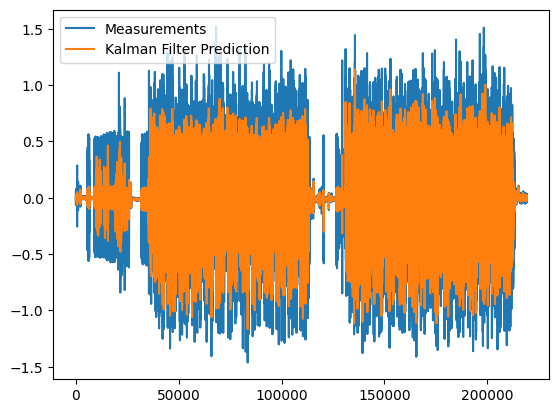

In [28]:
test(acc_x)

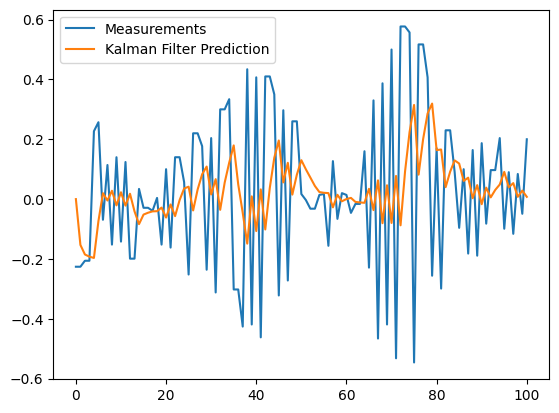

In [29]:
acc_x_100 = acc_x[20453:20554]
test(acc_x_100)